<a href="https://colab.research.google.com/github/Don-Heath/Python-for-Data-Analytics/blob/main/Simple_Bins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
## Demo - binning by date strategy

import pandas as pd
import numpy as np

def bin_time_series(data, freq, column):
    """
    This routine expects the incoming dataframe to use date as its index.
    Bins time series data based on the frequency and aggregates 'column'
        Frequency can be 'W', 'M', 'Q' or 'Y'
    """
    # Convert the index to a DatetimeIndex
    data.index = pd.to_datetime(data.index)

    # Aggregate the data using groupby and mean
    #data_aggregated = data.groupby(pd.Grouper(freq=freq))[column].mean().reset_index()

    # Aggregate data using groupby and sum
    data_aggregated = data.groupby(pd.Grouper(freq=freq))[column].sum().reset_index()

    return data_aggregated

def main():
    # Generate sample time series data
    dates = pd.date_range(start='2022-01-01', end='2022-12-31')

    # Set sales as the variable of interest in our sample dataframe, date as the index
    data = pd.DataFrame({'sales': np.random.randint(1, 100, len(dates))}, index=dates)

    print('Raw data')
    print(data.head())
    print()

    # Bin the data by week
    data_binned = bin_time_series(data, 'Q', 'sales')

    # Print the binned data
    print('Binned Data:')
    print()
    print(data_binned.head())

main()


365
Raw data
            sales
2022-01-01      8
2022-01-02      4
2022-01-03     85
2022-01-04     72
2022-01-05     34

Binned Data:

       index  sales
0 2022-03-31   4359
1 2022-06-30   4739
2 2022-09-30   4959
3 2022-12-31   4803


Enter two time periods to compare and the bin size.
Enter start date for period 1 (YYYY-MM-DD): 2022-01-30
Enter end date for period 1 (YYYY-MM-DD): 2022-03-31
Enter start date for period 2 (YYYY-MM-DD): 2022-04-01
Enter end date for period 2 (YYYY-MM-DD): 2022-06-30
Enter bin size (W for weekly, M for monthly, Y for yearly): m


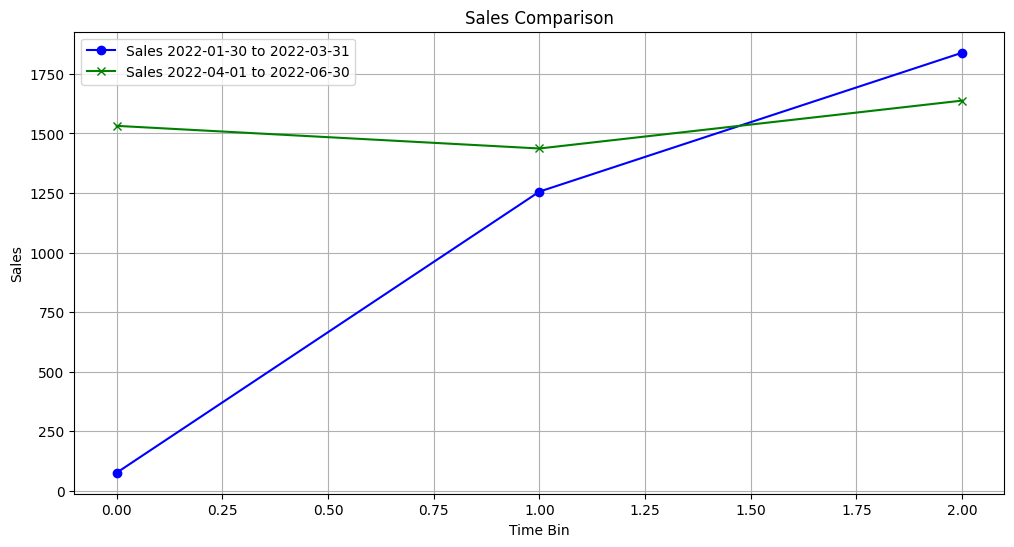

In [16]:
## Binning and plotting two datasets based on user-selected dates

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def bin_time_series(data, freq, column):
    """
    This routine expects the incoming dataframe to use date as its index.
    Bins time series data based on the frequency and aggregates 'column'
        Frequency can be 'W', 'M', 'Q' or 'Y'
    """
    # Convert the index to a DatetimeIndex
    data.index = pd.to_datetime(data.index)

    # Aggregate data using groupby and sum
    data_aggregated = data.groupby(pd.Grouper(freq=freq))[column].sum().reset_index()

    return data_aggregated

def plot_binned_data_line(data1, data2, column, title1, title2):
    """
    Plot binned data for two datasets as line plots.
    column is the column to plot.
    title1, title2 (str): Labels for the two data sets.
    """
    plt.figure(figsize=(12, 6))

    # Plot data
    plt.plot(data1.index, data1[column], label=title1, color='blue', marker='o')
    plt.plot(data2.index, data2[column], label=title2, color='green', marker='x')

    plt.title('Sales Comparison')
    plt.xlabel('Time Bin')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # User input for time periods and bin size
    print("Enter two time periods to compare and the bin size.")
    period1_start = input("Enter start date for period 1 (YYYY-MM-DD): ")
    period1_end = input("Enter end date for period 1 (YYYY-MM-DD): ")
    period2_start = input("Enter start date for period 2 (YYYY-MM-DD): ")
    period2_end = input("Enter end date for period 2 (YYYY-MM-DD): ")
    bin_size = input("Enter bin size (W for weekly, M for monthly, Y for yearly): ")

    # Generate sample time series data
    dates = pd.date_range(start='2022-01-01', end='2022-12-31')
    data = pd.DataFrame({'sales': np.random.randint(1, 100, len(dates))}, index=dates)

    # Bin the data for both periods
        # let's use loc (label based) to extract rows to create the bins
    data_period1 = bin_time_series(data.loc[period1_start:period1_end], bin_size, 'sales')
    data_period2 = bin_time_series(data.loc[period2_start:period2_end], bin_size, 'sales')

    # Plot the binned data as line plots
    plot_binned_data_line(
        data_period1, data_period2, 'sales',
        f'Sales {period1_start} to {period1_end}',
        f'Sales {period2_start} to {period2_end}'
    )

main()


Select the bin size for comparison:
1. Weekly
2. Monthly
3. Quarterly
4. Yearly
Enter your choice (1, 2, 3, or 4): 1


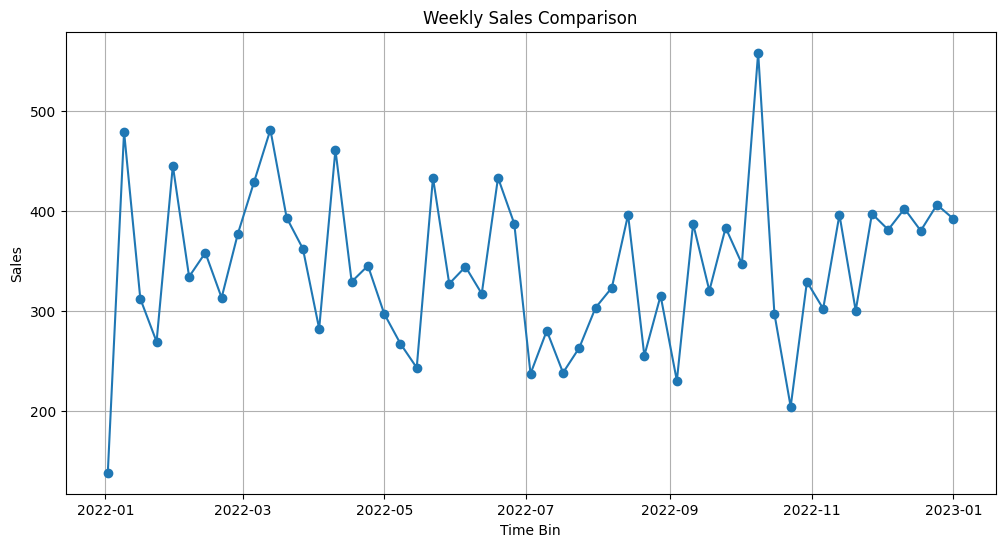

In [5]:
## Binning single entire dataset based on user-selected frequency

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def bin_time_series(data, freq, column):
    """
    This routine expects the incoming dataframe to use date as its index.
    Bins time series data based on the frequency and aggregates 'column'
        Frequency can be 'W', 'M', 'Q' or 'Y'
    """
    # Convert the index to a DatetimeIndex
    data.index = pd.to_datetime(data.index)

    # Aggregate the data using groupby and sum
    data_aggregated = data.groupby(pd.Grouper(freq=freq))[column].sum().reset_index()

    return data_aggregated

def plot_binned_data(data, column, title):
    """
    Plot the binned data as a line plot.

    Parameters:
    data (pandas.DataFrame): The binned data.
    column (str): The column to plot.
    title (str): The title for the plot.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data['index'], data[column], marker='o')
    plt.title(title)
    plt.xlabel('Time Bin')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.show()

def main():
    # Generate sample time series data
    dates = pd.date_range(start='2022-01-01', end='2022-12-31')
    data = pd.DataFrame({'sales': np.random.randint(1, 100, len(dates))}, index=dates)

    # User input for bin size
    print("Select the bin size for comparison:")
    print("1. Weekly\n2. Monthly\n3. Quarterly\n4. Yearly")
    choice = input("Enter your choice (1, 2, 3, or 4): ")

    if choice == '1':
        bin_size = 'W'
        title = 'Weekly Sales Comparison'
    elif choice == '2':
        bin_size = 'M'
        title = 'Monthly Sales Comparison'
    elif choice == '3':
        bin_size = 'Q'
        title = 'Quarterly Sales Comparison'
    elif choice == '4':
        bin_size = 'Y'
        title = 'Yearly Sales Comparison'
    else:
        print("Invalid choice. Please select 1, 2, 3, or 4.")
        return

    # Bin the data and plot
    data_binned = bin_time_series(data, bin_size, 'sales')
    plot_binned_data(data_binned, 'sales', title)

main()


Select the bin size for comparison:
1. Weekly
2. Monthly
3. Quarterly
4. Yearly
Enter your choice (1, 2, 3, or 4): 3


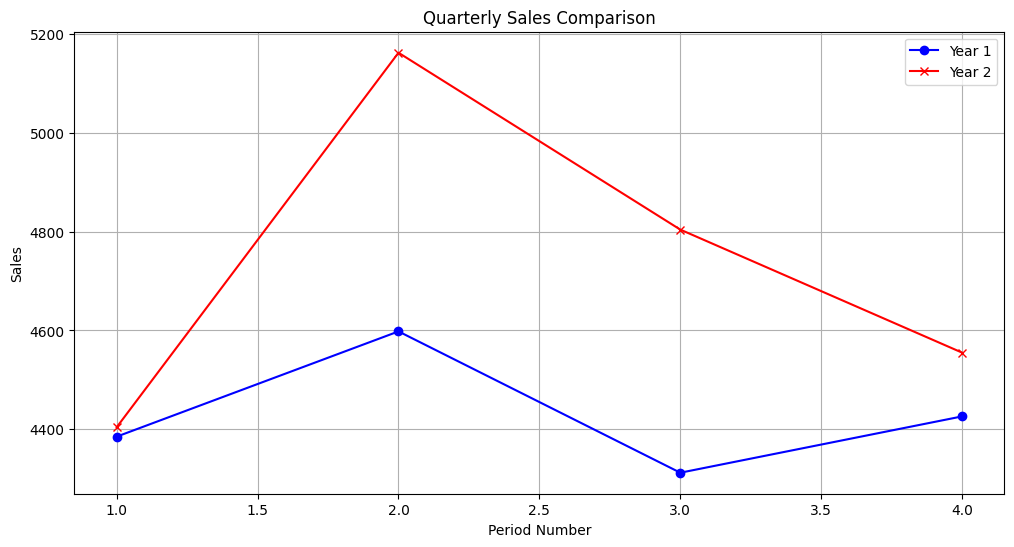

In [17]:
## Binning two datasets based on user-selected frequency

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def bin_time_series(data, freq, column):
    # Convert the index to a DatetimeIndex
    data.index = pd.to_datetime(data.index)

    # Aggregate the data using groupby and sum
    data_aggregated = data.groupby(pd.Grouper(freq=freq))[column].sum().reset_index()

    return data_aggregated

def plot_period_comparison(data1, data2, column, title):
    """
    Plot period comparisons
    - data1, data2 are the binned data for the two periods.
    - column is the column to plot.
    - title is the title for the plot
    """
    plt.figure(figsize=(12, 6))

    # Assign period numbers
    data1['period'] = range(1, len(data1) + 1)
    data2['period'] = range(1, len(data2) + 1)

    # Plot data for the first and second periods
    plt.plot(data1['period'], data1[column], label='Year 1', color='blue', marker='o')
    plt.plot(data2['period'], data2[column], label='Year 2', color='red', marker='x')

    plt.title(title)
    plt.xlabel('Period Number')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():

    # Generate sample time series data for two years
    dates1 = pd.date_range(start='2022-01-01', end='2022-12-31')
    dates2 = pd.date_range(start='2023-01-01', end='2023-12-31')
    data1 = pd.DataFrame({'sales': np.random.randint(1, 100, len(dates1))}, index=dates1)
    data2 = pd.DataFrame({'sales': np.random.randint(1, 100, len(dates2))}, index=dates2)

    # User input for bin size
    print("Select the bin size for comparison:")
    print("1. Weekly\n2. Monthly\n3. Quarterly\n4. Yearly")
    choice = input("Enter your choice (1, 2, 3, or 4): ")

    if choice == '1':
        bin_size = 'W'
        title = 'Weekly Sales Comparison'
    elif choice == '2':
        bin_size = 'M'
        title = 'Monthly Sales Comparison'
    elif choice == '3':
        bin_size = 'Q'
        title = 'Quarterly Sales Comparison'
    elif choice == '4':
        bin_size = 'Y'
        title = 'Yearly Sales Comparison'
    else:
        print("Invalid choice. Please select 1, 2, 3, or 4.")
        return

    # Bin the data for both years and plot
    data_binned_1 = bin_time_series(data1, bin_size, 'sales')
    data_binned_2 = bin_time_series(data2, bin_size, 'sales')
    plot_period_comparison(data_binned_1, data_binned_2, 'sales', title)

main()


Enter the start year for comparison: 2000
Enter the end year for comparison: 2005
Select the bin size for comparison:
1. Weekly
2. Monthly
3. Quarterly
4. Yearly
Enter your choice (1, 2, 3, or 4): 2


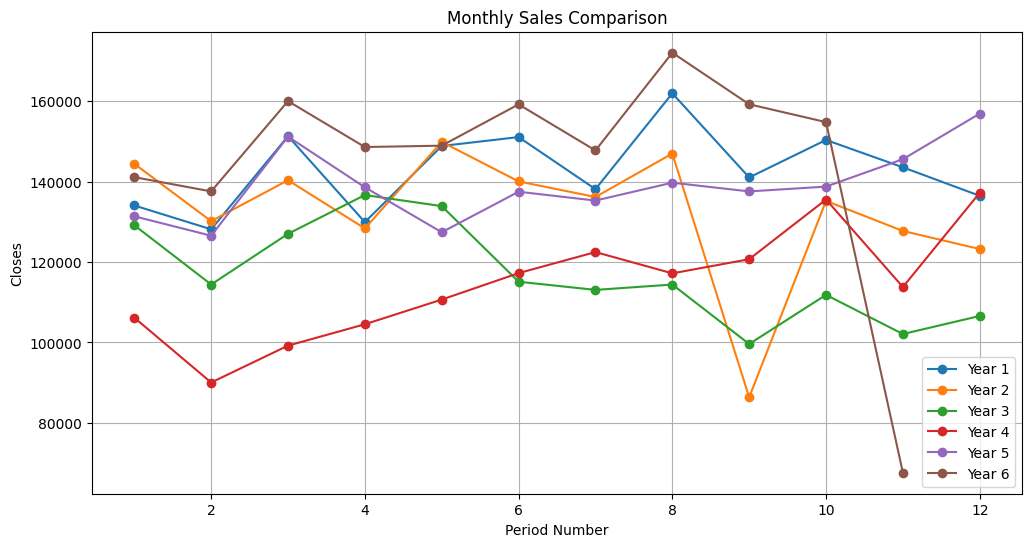

In [10]:
## Binning datasets based on user-selected date range and frequency

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def bin_time_series(data, freq, column):
    # Convert the 'Date' column to a DatetimeIndex
    data.index = pd.to_datetime(data['Dates'])
    data = data.drop(columns=['Dates'])  # Removing 'Dates' column as it's now the index

    # Aggregate the data using groupby and sum
    data_aggregated = data.groupby(pd.Grouper(freq=freq))[column].sum().reset_index()

    return data_aggregated

def plot_period_comparison(dataframes, column, title):
    """
    Plot period comparisons
    - data1, data2 are the binned data for the two periods.
    - column is the column to plot.
    - title is the title for the plot
    """
    plt.figure(figsize=(12, 6))

    # Define a list of colors
    colors = list(mcolors.TABLEAU_COLORS)  # or any other colormap

    for i, df in enumerate(dataframes):
        # Assign period numbers
        df['period'] = range(1, len(df) + 1)

        # Plot data
        plt.plot(df['period'], df[column], label=f'Year {i+1}', color=colors[i % len(colors)], marker='o')

    plt.title(title)
    plt.xlabel('Period Number')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

def main():

    file_name = '/content/NYSESW.csv'
    df = pd.read_csv(file_name, skipinitialspace=True, header=0)
    df['Dates'] = pd.to_datetime(df['Dates'])

    # User input for start and end year
    start_year = int(input("Enter the start year for comparison: "))
    end_year = int(input("Enter the end year for comparison: "))

    # Filter data for the specified year range
    df = df[(df['Dates'].dt.year >= start_year) & (df['Dates'].dt.year <= end_year)]

    # Split the data into separate DataFrames for each year
    unique_years = df['Dates'].dt.year.unique()
    dataframes = {}
    for year in unique_years:
        dataframes[year] = df[df['Dates'].dt.year == year]

    # User input for bin size
    print("Select the bin size for comparison:")
    print("1. Weekly\n2. Monthly\n3. Quarterly\n4. Yearly")
    choice = input("Enter your choice (1, 2, 3, or 4): ")

    if choice == '1':
        bin_size = 'W'
        title = 'Weekly Sales Comparison'
    elif choice == '2':
        bin_size = 'M'
        title = 'Monthly Sales Comparison'
    elif choice == '3':
        bin_size = 'Q'
        title = 'Quarterly Sales Comparison'
    elif choice == '4':
        bin_size = 'Y'
        title = 'Yearly Sales Comparison'
    else:
        print("Invalid choice. Please select 1, 2, 3, or 4.")
        return

    # Bin the data for each year
    binned_dataframes = []
    for year, data in dataframes.items():
        binned_df = bin_time_series(data, bin_size, 'Closes')
        binned_dataframes.append(binned_df)

    # Plot the binned data
    plot_period_comparison(binned_dataframes, 'Closes', title)

if __name__ == "__main__":
    main()

In [11]:
## using autogenerated bins for numeric column(s)

import pandas as pd

def bin_ncol(df, to_bin, num_bins, labels):
    """
    to_bin = list of numeric columns for which to create bins
    num_bins = number of bins to create
    returns df with additional columns for the bins
    """
    df_binned = df.copy()
    bins_dict = {}

    for column in to_bin:
        # Bin the column and retrieve the bins
        df_binned[column + '_bin'], bins = pd.cut(df_binned[column], bins=num_bins, labels=labels, retbins=True, precision=2)
        bins_dict[column] = bins

    # Return the modified DataFrame and the bins dictionary
    return df_binned, bins_dict

def main():

    data = pd.DataFrame({
        'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
        'age': [23, 28, 37, 41, 52],
        'gender': ['F', 'M', 'M', 'M', 'F'],
        'income': [50000.33, 70000, 90000, 120000, 150000]
    })

    # List of columns to bin
    columns_to_bin = ['income']

    # Bin the specified columns into 3 categories
    bin_labels = ['low', 'medium', 'high']
    data_binned, bins_dict = bin_ncol(data, columns_to_bin, 3, bin_labels)

    # Print the binned data
    print(data_binned.head())

    # Print the bins for each column
    print()
    for column in columns_to_bin:
        print(f"Cut values for {column}: {bins_dict[column].round(2)}")

if __name__ == "__main__":
    main()


      name  age gender     income income_bin
0    Alice   23      F   50000.33        low
1      Bob   28      M   70000.00        low
2  Charlie   37      M   90000.00     medium
3    David   41      M  120000.00       high
4     Emma   52      F  150000.00       high

Cut values for income: [ 49900.33  83333.55 116666.78 150000.  ]


In [13]:
## passing the cut values for the bins rather than the number of bins to autogenerate

import pandas as pd

def bin_column(df, column, bins, labels):
    """
    column = numeric column for which to create bins
    bins = list of bin edges
    labels = labels for the bins
    returns df with an additional column for the bins
    """
    df_binned = df.copy()

    # Bin the column and retrieve the bins
    df_binned[column + '_bin'], bins = pd.cut(df_binned[column], bins=bins, labels=labels, retbins=True)

    # Return the modified DataFrame and the bins
    return df_binned, bins

def main():

    data = pd.DataFrame({
        'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
        'age': [23, 28, 37, 41, 52],
        'gender': ['F', 'M', 'M', 'M', 'F'],
        'income': [50000.33, 70000, 90000, 120000, 150000]
    })

    # User input for the column to bin and bin edges
    column_to_bin = input("Enter the column name to bin: ")
    user_bins = input("Enter the bin edges (comma-separated): ")
    bin_edges = list(map(float, user_bins.split(',')))

    # Labels for the bins
    bin_labels = input("Enter labels for the bins (comma-separated): ").split(',')

    # Bin the specified column
    data_binned, bins = bin_column(data, column_to_bin, bin_edges, bin_labels)
    print()

    # Print the binned data and the bins
    print(data_binned.head())
    print()

    print(f"Cut values for {column_to_bin}: {bins}")

if __name__ == "__main__":
    main()


Enter the column name to bin: age
Enter the bin edges (comma-separated): 20,35,45,60
Enter labels for the bins (comma-separated): yound, middle, old

      name  age gender     income  age_bin
0    Alice   23      F   50000.33    yound
1      Bob   28      M   70000.00    yound
2  Charlie   37      M   90000.00   middle
3    David   41      M  120000.00   middle
4     Emma   52      F  150000.00      old

Cut values for age: [20. 35. 45. 60.]
